# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
# Suppress all deprecation warnings (not recommended)
warnings.simplefilter("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
my_btc_value = requests.get(btc_url).json()
btc_value = my_btc_value['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
my_eth_value = requests.get(eth_url).json()
eth_value = my_eth_value['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59929.20
The current value of your 5.3 ETH is $14039.22


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp('2023-9-21', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data into separate DataFrames
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
combined_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!
combined_portfolio

AGG                                             \
                           close     high    low trade_count  open   volume   
timestamp                                                                     
2023-09-21 04:00:00+00:00  94.65  94.8059  94.64       25112  94.8  8028921   

                                         SPY                              \
                                vwap   close    high     low trade_count   
timestamp                                                                  
2023-09-21 04:00:00+00:00  94.707747  431.39  435.97  431.23      677716   

                                                         
                            open     volume        vwap  
timestamp                                                
2023-09-21 04:00:00+00:00  435.7  104095828  433.697795

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(combined_portfolio["AGG"]["close"])
spy_close_price = float(combined_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.65
Current SPY closing price: $431.39


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21569.50
The current value of your 200 AGG shares is $18930.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value

# Create savings DataFrame
df_savings = pd.DataFrame(
    {
        "amount": [crypto, my_agg_value + my_spy_value]
    },
    columns = ["amount"],
    index = ["crypto", "shares"]
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,73968.423
shares,40499.500


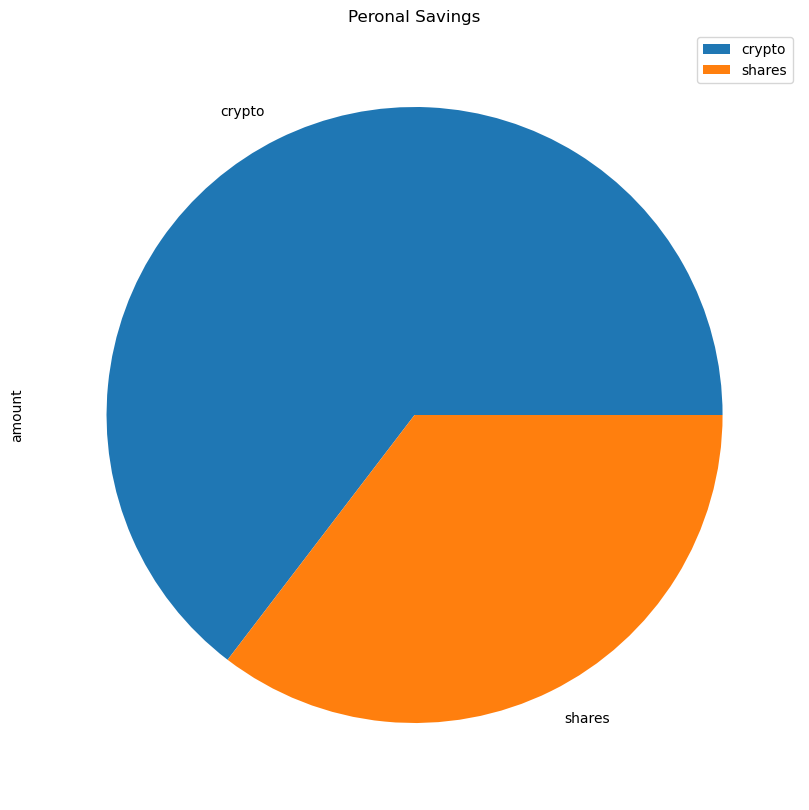

In [12]:
# Plot savings pie chart
df_savings.plot.pie(figsize = (10,10), y = 'amount', title = "Peronal Savings");

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = df_savings['amount'].sum()
total_amount_savings

# Validate saving health
if total_amount_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_amount_savings < emergency_fund:
    print('You need to start working smarter')
elif total_amount_savings == emergency_fund:
    print('thats odd')
else:
    print('you are not doing so great')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]
df_tickers = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df    

# Reorganize the DataFrame
# Separate ticker data
AGG = df_tickers[df_tickers['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_tickers[df_tickers['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
display(stock_data.head())
display(stock_data.tail())

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2021-04-26 04:00:00+00:00  114.65  114.8015  114.65       13521  114.74   
2021-04-27 04:00:00+00:00  114.37  115.1300  114.37       12734  115.13   
2021-04-28 04:00:00+00:00  114.43  114.4685  114.20       24329  114.45   
2021-04-29 04:00:00+00:00  114.37  114.3700  114.09       21243  114.14   
2021-04-30 04:00:00+00:00  114.49  114.5150  114.33       19584  114.41   

                                                   SPY                    \
                            volume        vwap   close    high       low   
timestamp                                                                  
2021-04-26 04:00:00+00:00  3687396  114.703085  417.61  418.22  416.8111   
2021-04-27 04:00:00+00:00  3962274  114.493905  417.52  418.14  416.3000   
2021-04-28 04:00:00+00:00  7411127  114.382062  417.40  419.01  416.9000   
2021-04-29 04:00:00+00:00  6709216  114.258020  420.06  420.72  416.4400   
2021-04-30 04:00:00+00:00  7705463  114.461660  417.30  418.54  416.3400   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2021-04-26 04:00:00+00:00      297405  417.44  53597096  417.511219  
2021-04-27 04:00:00+00:00      301338  417.93  52112393  417.481640  
2021-04-28 04:00:00+00:00      332655  417.81  51994369  417.739706  
2021-04-29 04:00:00+00:00      452194  420.32  80506526  418.860662  
2021-04-30 04:00:00+00:00      481284  417.63  87467317  417.640930

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
sum_statistic = MCSimulation(
    portfolio_data = stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
sum_statistic.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
sum_statistic.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 110.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 120.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 130.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 140.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 150.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 160.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 170.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 180.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 190.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 200.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 210.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 220.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 230.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 240.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 250.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 260.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 270.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 280.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 290.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 300.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 310.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 320.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 330.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 340.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 350.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 360.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 370.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 380.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 390.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 400.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 410.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 420.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 430.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 440.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 450.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 460.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 470.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 480.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 490.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983621,1.004307,1.000683,1.003303,0.998215,1.005526,1.004680,0.990980,1.006969,0.993564,...,1.006223,0.994160,0.997710,1.000281,0.991852,1.007486,0.989376,0.999777,1.000088,0.991517
2,0.985335,0.996734,1.011886,1.008613,0.992220,1.003252,1.011963,0.978866,1.009927,1.003611,...,1.005913,0.998487,0.991176,0.993654,0.974216,0.989770,0.985780,0.991956,0.998698,0.991725
3,0.982745,1.000379,1.015686,1.004829,0.986578,1.021931,1.012812,0.991624,1.007125,1.009044,...,1.016540,0.992819,0.989605,1.005374,0.960584,0.978419,0.982551,1.002169,1.010103,0.987586
4,0.989933,1.010549,0.998942,1.004757,0.976709,1.019009,1.018413,0.986259,0.998261,1.018944,...,1.023652,0.990397,0.988880,1.012118,0.965331,0.977808,0.984470,1.008376,1.007334,0.975638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.501657,14.976520,36.637589,33.305247,8.996819,32.164546,4.997816,11.722947,8.858657,17.129431,...,36.530919,7.109402,7.435218,31.674119,19.282576,17.439733,13.951228,13.841972,19.410983,6.510919
7557,9.381436,15.101101,36.542777,33.348506,9.111661,32.243899,5.052555,11.769691,8.932380,17.099731,...,36.396272,7.110553,7.516576,32.034518,19.310345,17.510847,13.958504,13.948867,19.336858,6.523056
7558,9.303553,15.186368,36.401989,33.042993,9.204920,32.165747,5.100788,11.778617,8.862748,17.046189,...,36.667614,7.186485,7.565068,31.909706,19.264347,17.565915,13.879995,14.177194,19.438502,6.522670
7559,9.233065,14.953994,35.947688,33.531950,9.230326,32.043789,5.112200,11.900593,8.891890,17.054034,...,36.550269,7.186481,7.674507,31.953042,19.462811,17.748479,13.892394,14.087251,19.853699,6.568619


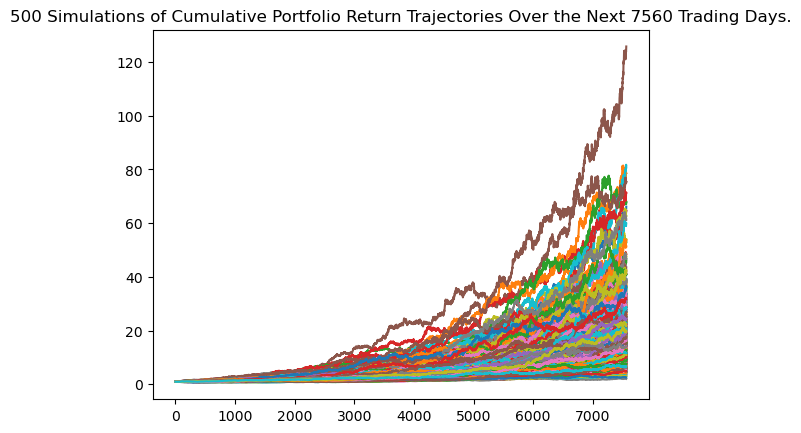

In [20]:
# Plot simulation outcomes
mc_distribution_plot = sum_statistic.plot_simulation()

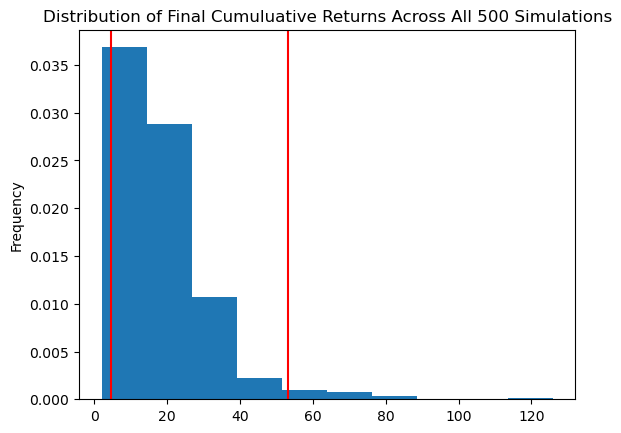

In [21]:
# Plot probability distribution and confidence intervals
mc_distribution_probability = sum_statistic.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_statistics = sum_statistic.summarize_cumulative_return()

# Print summary statistics
sum_statistics

/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean             18.826388
std              13.072041
min               2.066029
25%              10.942759
50%              15.221520
75%              22.771102
max             125.810157
95% CI Lower      4.664455
95% CI Upper     53.290301
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_statistics[8]*initial_investment,2)
ci_upper = round(sum_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93289.1 and $1065806.02


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_statistics[8]*initial_investment,2)
ci_upper = round(sum_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139933.65 and $1598709.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
sum_statistic_5 = MCSimulation(
    portfolio_data = stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
sum_statistic_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 490.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997975,1.002449,1.003512,0.993724,0.993908,0.999090,1.005785,1.000592,1.004606,1.015993,...,0.996908,0.997016,1.017700,1.005422,0.992905,1.007084,0.988621,1.006990,0.992128,1.002540
2,1.008434,1.009643,0.991483,1.004102,0.988008,1.003322,0.999216,0.994780,0.996505,1.010991,...,0.995424,0.999046,1.011703,1.017558,0.994920,1.007316,0.977698,1.007041,0.995403,0.998626
3,1.015455,1.008358,0.986047,1.009964,0.991438,1.001458,0.999814,0.987685,0.994865,1.013228,...,1.003413,0.996925,1.021348,1.025809,1.001993,1.013130,0.959049,1.000210,0.996551,0.992672
4,1.031363,1.013506,0.993008,1.006984,1.002522,1.016176,1.004065,0.980241,0.986520,1.021468,...,1.001435,1.006164,1.017207,1.038648,1.005540,1.008791,0.958386,1.004203,0.998950,0.986516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.018540,1.799439,1.660408,1.918547,1.744204,1.098833,1.944762,1.888081,1.863265,1.743991,...,1.533732,1.958520,2.230948,1.321669,1.351454,0.992401,1.554659,1.373491,1.292924,1.401984
1257,3.011092,1.805669,1.651985,1.932866,1.743532,1.094742,1.950137,1.881353,1.868612,1.768506,...,1.552263,1.949332,2.227663,1.325546,1.364382,1.011930,1.549479,1.364553,1.298893,1.413444
1258,3.041315,1.807193,1.643351,1.920749,1.742025,1.093867,1.959045,1.888293,1.856865,1.758062,...,1.549314,1.927221,2.234530,1.339742,1.363061,1.011316,1.548416,1.364391,1.292974,1.395415
1259,3.047345,1.798122,1.641066,1.911868,1.741930,1.092491,1.939636,1.887003,1.851539,1.758683,...,1.544630,1.917633,2.210039,1.345342,1.371965,1.006822,1.546059,1.384561,1.280672,1.393607


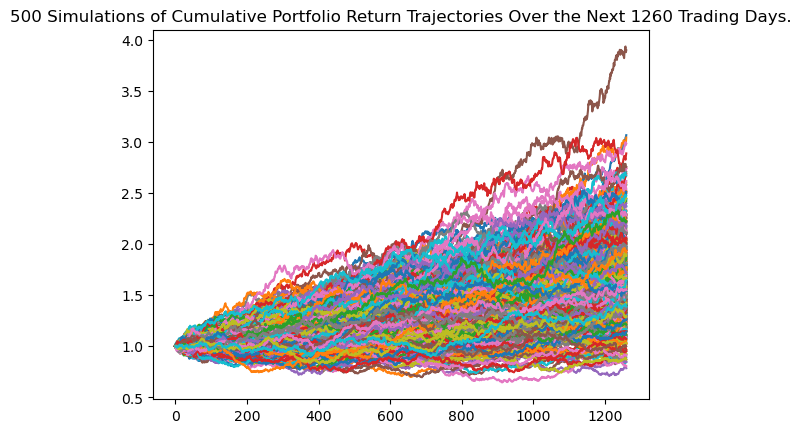

In [27]:
# Plot simulation outcomes
mc_distribution_plot_5 = sum_statistic_5.plot_simulation()

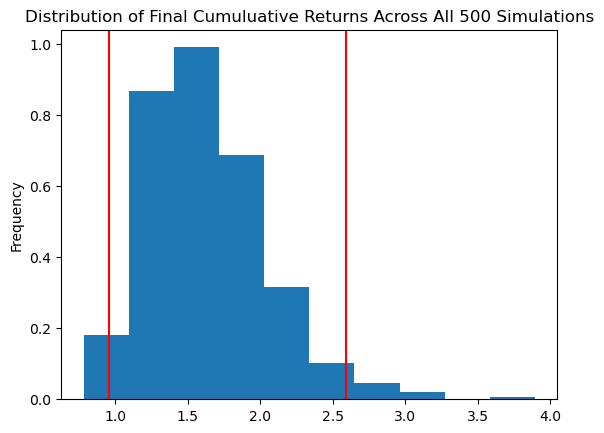

In [28]:
# Plot probability distribution and confidence intervals
mc_distribution_probability_5 = sum_statistic_5.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_statistics_5 = sum_statistic_5.summarize_cumulative_return()

# Print summary statistics
sum_statistics_5

/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.631533
std               0.412786
min               0.784967
25%               1.348269
50%               1.582567
75%               1.863707
max               3.894521
95% CI Lower      0.959058
95% CI Upper      2.589632
Name: 1260, dtype: float64

In [30]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_statistics_5[8]*initial_investment,2)
ci_upper_five = round(sum_statistics_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57543.45 and $155377.92


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
sum_statistic_10 = MCSimulation(
    portfolio_data = stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
sum_statistic_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 180.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 330.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/H

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000869,0.982345,1.005466,1.004537,1.001187,1.004466,1.000122,0.999032,1.000292,1.000602,...,1.012623,0.996170,0.995977,0.996621,1.004910,1.000047,0.990046,0.999304,0.988629,1.002694
2,1.005104,0.984426,1.014988,1.007009,1.000482,1.005052,0.996783,1.005489,1.001962,1.011958,...,1.001685,1.006991,0.982737,1.007416,0.998069,1.001656,0.995619,0.993365,0.986636,1.012835
3,0.992520,0.980308,1.005778,1.005311,1.010951,0.994593,0.996014,1.017137,1.005537,1.013786,...,0.998014,0.997082,0.983118,1.007609,1.002937,1.024052,0.997385,0.978676,0.999586,1.029114
4,0.991204,0.970637,1.002328,0.996773,1.009457,1.006482,0.994128,1.029260,1.006309,1.011207,...,0.989642,1.003006,0.987702,1.000088,1.012272,1.033228,0.993847,0.973923,1.013656,1.042393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.225263,1.354471,2.029016,2.089308,1.883532,4.547739,2.439853,2.936523,1.601663,3.073097,...,2.579008,1.668019,2.128106,2.724733,2.725260,5.036409,3.495676,2.098180,1.582414,3.999482
2517,1.244260,1.348029,2.032947,2.104513,1.893264,4.581422,2.478296,2.942535,1.611256,3.079408,...,2.564613,1.655406,2.128037,2.737567,2.724573,5.039675,3.514970,2.083246,1.593218,4.022602
2518,1.233831,1.349468,2.044777,2.118794,1.892663,4.536783,2.478776,2.964653,1.613215,3.050109,...,2.553973,1.641097,2.121385,2.697141,2.727651,5.070473,3.541622,2.094430,1.596671,4.006817
2519,1.245248,1.345295,2.043855,2.124462,1.885310,4.535285,2.490436,2.953567,1.618815,3.015467,...,2.540650,1.645274,2.131088,2.725553,2.756640,5.029029,3.540485,2.083887,1.604950,4.013798


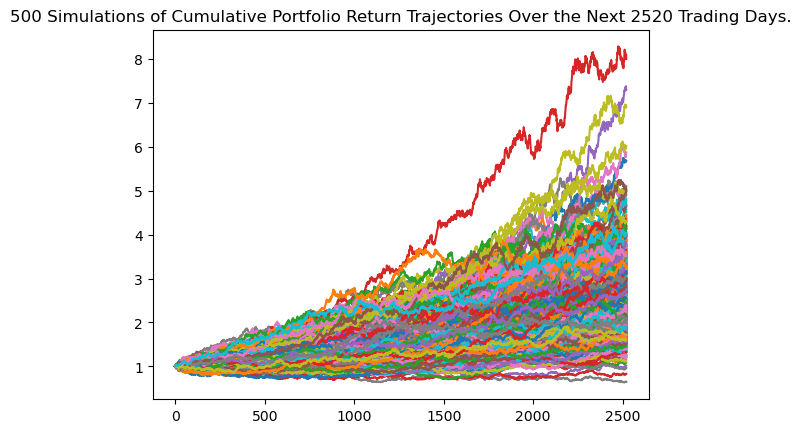

In [33]:
# Plot simulation outcomes
mc_distribution_plot_10 = sum_statistic_10.plot_simulation()

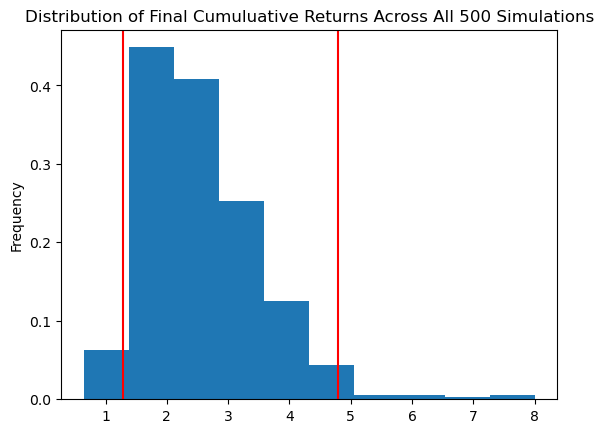

In [34]:
# Plot probability distribution and confidence intervals
mc_distribution_probability_10 = sum_statistic_10.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_statistics_10 = sum_statistic_10.summarize_cumulative_return()

# Print summary statistics
sum_statistics_10

/Users/clarencecox/Documents/GitHub/Financial-Planner-Module-5/Homework Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              2.578327
std               0.965438
min               0.646972
25%               1.868811
50%               2.403640
75%               3.132653
max               8.004212
95% CI Lower      1.286476
95% CI Upper      4.795480
Name: 2520, dtype: float64

In [36]:
# Set initial investment
initial_investment = 60000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_statistics_10[8]*initial_investment,2)
ci_upper_ten = round(sum_statistics_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $90000.0 in the portfolio over the next 10 years will end within in the range of $115782.82 and $431593.19
